# 预备知识

In [6]:
import torch
x = torch.arange(12) # 顺序
x.numel()
x.reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
torch.zeros((2, 3, 4))
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [7]:
torch.randn(3, 4)

tensor([[-0.3979,  0.1440, -1.3631,  0.6400],
        [ 0.9541, -0.7486, -0.1655, -1.1295],
        [-0.7702,  0.2788,  0.0680, -0.7460]])

In [9]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y),dim=0), torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
# 广播机制：针对shape不同的tensor
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [11]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [16]:
X[0:2, :] = 12 # 指定index改变元素
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [19]:
# 原地操作
# 法1: 切片
before = id(X)
X[:] = X + Y
before == id(X)

True

In [20]:
before = id(X)
X = X + Y
before == id(X)

False

In [21]:
# 法2: += 运算符
before = id(X)
X += Y
before == id(X)

True

In [22]:
# numpy <-> tensor
A = X.numpy()
B = torch.tensor(A) # numpy(`ndarray`) -> tensor
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [24]:
a = torch.tensor([3.5])
a, a.item() # 转为标量

(tensor([3.5000]), 3.5)

In [41]:
import os
# 使用os.path.join是为了自适应win/linux系统路径格式
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')
# csv文件，逗号为分隔符

In [42]:
import pandas as pd
data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [43]:
type(data)
# pandas的dataframe

pandas.core.frame.DataFrame

In [61]:
missing_max = data.isnull().sum().idxmax()
# 删除缺失值最多的列
data_cleaned = data.drop(columns=missing_max)
data_cleaned = data_cleaned.fillna(data_cleaned.mean(numeric_only=True))

In [62]:
data_ndarray = torch.tensor(data_cleaned.to_numpy(dtype=float))
data_ndarray
# 转为tensor格式

tensor([[3.0000e+00, 1.2750e+05],
        [2.0000e+00, 1.0600e+05],
        [4.0000e+00, 1.7810e+05],
        [3.0000e+00, 1.4000e+05]], dtype=torch.float64)

In [37]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
# 插值法，用均值填充
inputs = inputs.fillna(inputs.mean(numeric_only=True)) 
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [39]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


pandas.core.frame.DataFrame

In [40]:
import torch
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
# dataframe -> numpy: using `to_numpy`
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [63]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x, y

(tensor(3.), tensor(2.))

In [65]:
x = torch.arange(12)
x.shape
# 维度
# 向量：拥有轴的数量
# 张量：长度

torch.Size([12])

In [114]:
A = torch.arange(12, dtype=torch.float32).reshape(3, 4)
A.T
type(A)

torch.Tensor

In [72]:
# 张量（tensor)是矩阵的推广
X = torch.arange(24).reshape(2, 3, 4) # 2 x 3 x 4 tensor
# 对应元素相加、相乘（Hadamard积）
Y = X.clone()
X, X * Y


(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[  0,   1,   4,   9],
          [ 16,  25,  36,  49],
          [ 64,  81, 100, 121]],
 
         [[144, 169, 196, 225],
          [256, 289, 324, 361],
          [400, 441, 484, 529]]]))

In [73]:
X.shape

torch.Size([2, 3, 4])

In [75]:
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [77]:
# 利用求和sum来降维
A_sum_axis1 = A.sum(axis=1) # axis 轴
A_sum_axis1

tensor([ 6, 22, 38])

In [82]:
A.sum(axis=[0, 1])
A.sum()

torch.Size([3, 4])

In [85]:
A.mean(axis=0,dtype=float), A.sum(axis=0) / A.shape[0]

(tensor([4., 5., 6., 7.], dtype=torch.float64), tensor([4., 5., 6., 7.]))

In [100]:
# 点积 dot product
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [116]:
# 矩阵-向量 乘法：使用`mv`
print(A.dtype)
print(x.dtype)
torch.mv(A, x)

# 指定数据类型
# dtype=torch.float32
# dtype=float python标准类型，实为float64

torch.float32
torch.float32


tensor([14., 38., 62.])

In [120]:
# 矩阵-矩阵 乘法：使用`mm`
B = torch.ones(4, 3)
A, B


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

In [121]:
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.]])

In [124]:
# 范数
u = torch.tensor([3.0, -4.0])
torch.norm(u) # 默认L2范数
torch.abs(u).sum() # 利用sum计算L1范数

tensor(6.)

In [127]:
matrix = torch.ones(4, 9) # 4 * 9的矩阵
torch.norm(matrix)

tensor(6.)

In [128]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [130]:
def use_svg_display(): #@save
    backend_inline.set_matplotlib_formats('svg') 

In [132]:
d2l.use_svg_display()

In [138]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [133]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

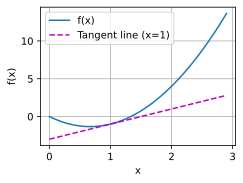

In [139]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$


In [141]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [144]:
x.requires_grad_(True) # 分配梯度内存
x.grad

In [143]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [145]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [146]:
x.grad == 4 * x

tensor([True, True, True, True])

In [147]:
x.grad.zero_() # 重置梯度；_表示原地操作
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [152]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [153]:
# 分离计算
x.grad.zero_()
y = x * x
u = y.detach() # u与y相同但是从计算图中分离
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [154]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [162]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
print(a)
d = f(a)
d.backward()

tensor(-0.7739, requires_grad=True)


In [163]:
d / a == a.grad

tensor(True)

# 概率论
- 边际分布
- 

In [164]:
0.0015 / 0.011485

0.13060513713539398

In [167]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

In [168]:
dir(list)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']